In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [3]:
input_file = 'Seahorse_on_HLMVEC_Dec_2nd.xlsx'

# read information

In [4]:
df = pandas.read_excel(input_file, sheet_name='Rate')
df

Measurement Well       Group       Time  OCR  ECAR  PER
0               1  A01  Background   1.309773  0.0   0.0    0
1               1  A02  Background   1.309773  0.0   0.0    0
2               1  A03  Background   1.309773  0.0   0.0    0
3               1  A04  Background   1.309773  0.0   0.0    0
4               1  A05  Background   1.309773  0.0   0.0    0
...           ...  ...         ...        ...  ...   ...  ...
1435           15  H08  Background  91.908998  0.0   0.0    0
1436           15  H09  Background  91.908998  0.0   0.0    0
1437           15  H10  Background  91.908998  0.0   0.0    0
1438           15  H11  Background  91.908998  0.0   0.0    0
1439           15  H12  Background  91.908998  0.0   0.0    0

[1440 rows x 7 columns]

In [5]:
df['Group'].unique()

array(['Background', 'Control', '24 HRS - Adreanline:Noradrenaline 5 uM',
       '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Tnfa',
       '4 HRS - Adreanline:Noradrenaline 5 uM',
       '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Tnfa'],
      dtype=object)

# OCR at four hours

Control
	 before normalization


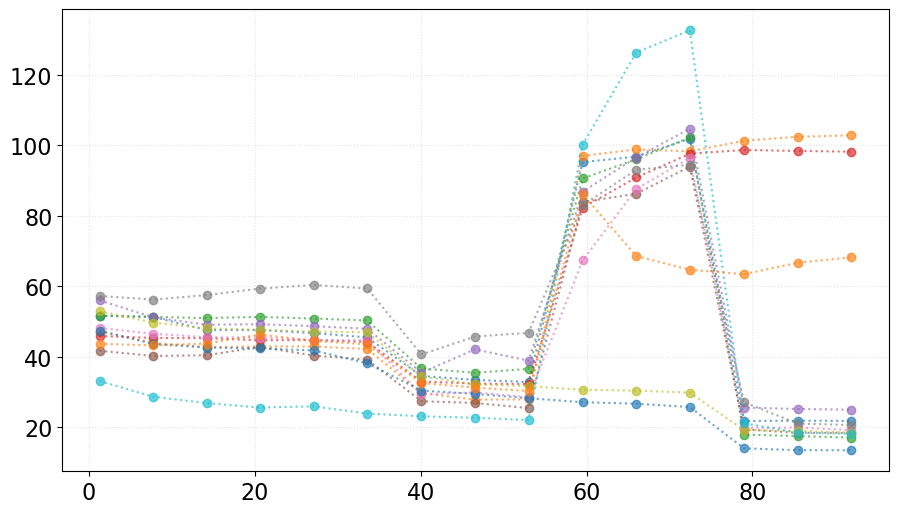

	 after excluding technical failures


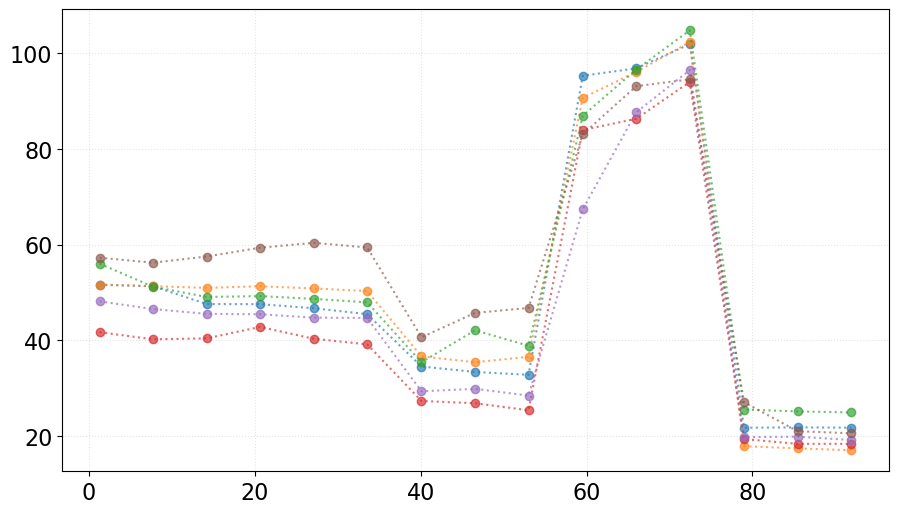

B02    1.016296
C02    1.024606
D02    1.059785
D11    0.873264
E02    0.911857
E11    1.114192
dtype: float64
	 after normalization


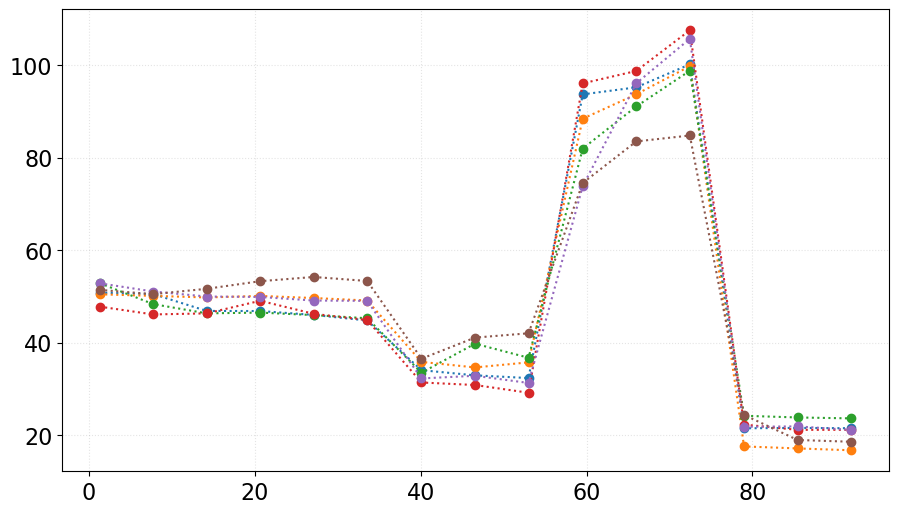

4 HRS - Adreanline:Noradrenaline 0.5 uM
	 before normalization


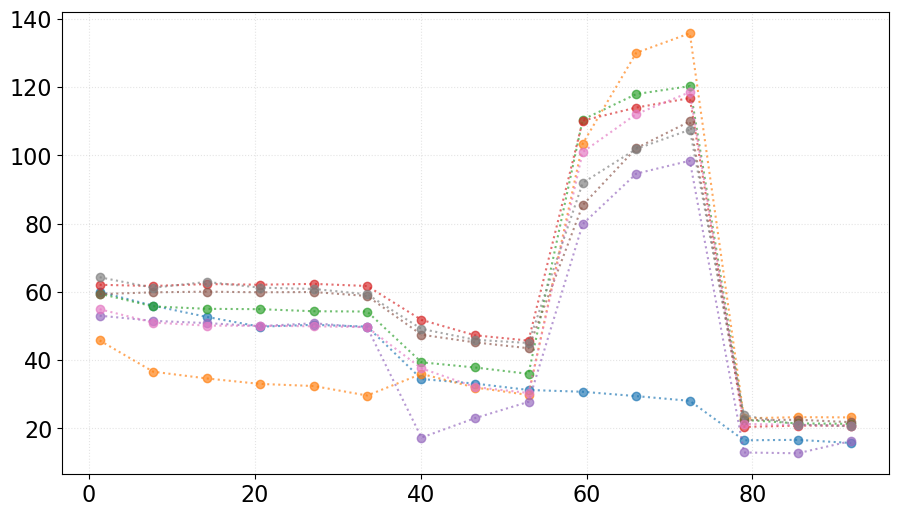

	 after excluding technical failures


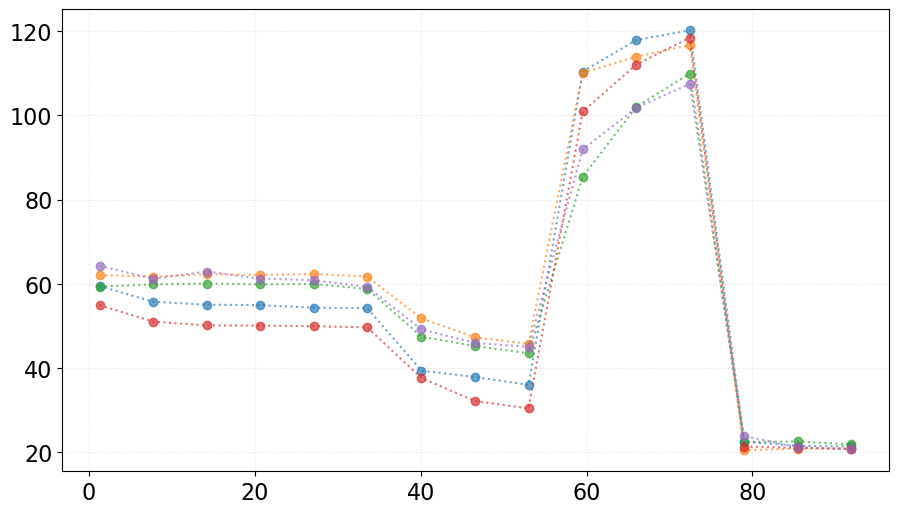

F05    0.997238
F06    1.065720
F08    0.994196
F09    0.927224
F10    1.015622
dtype: float64
	 after normalization


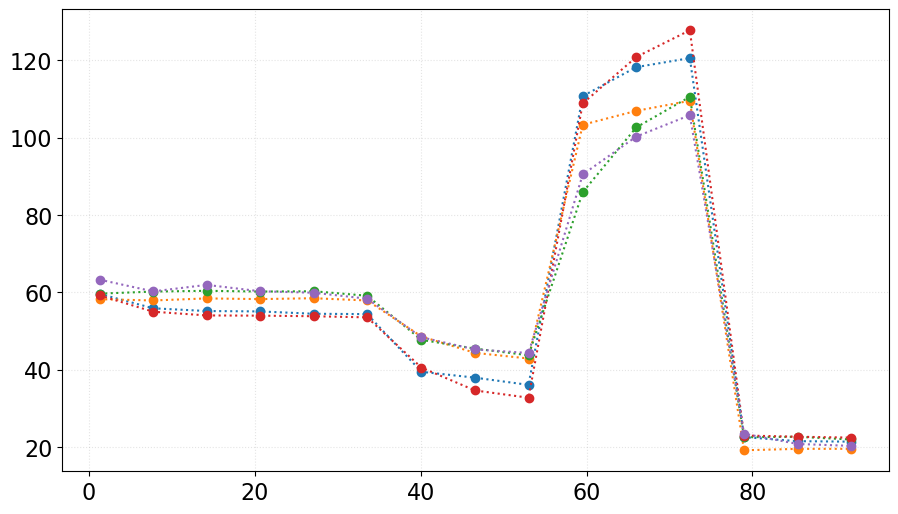

4 HRS - Adreanline:Noradrenaline 5 uM
	 before normalization


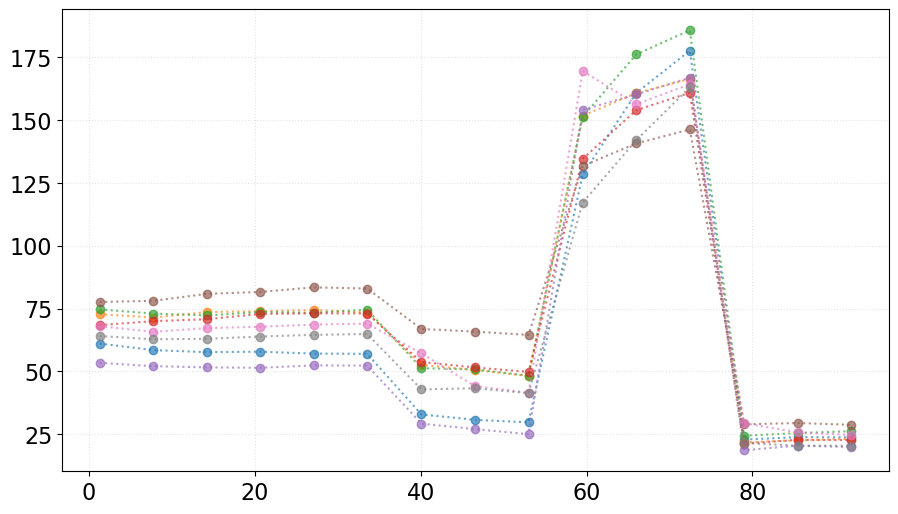

	 after excluding technical failures


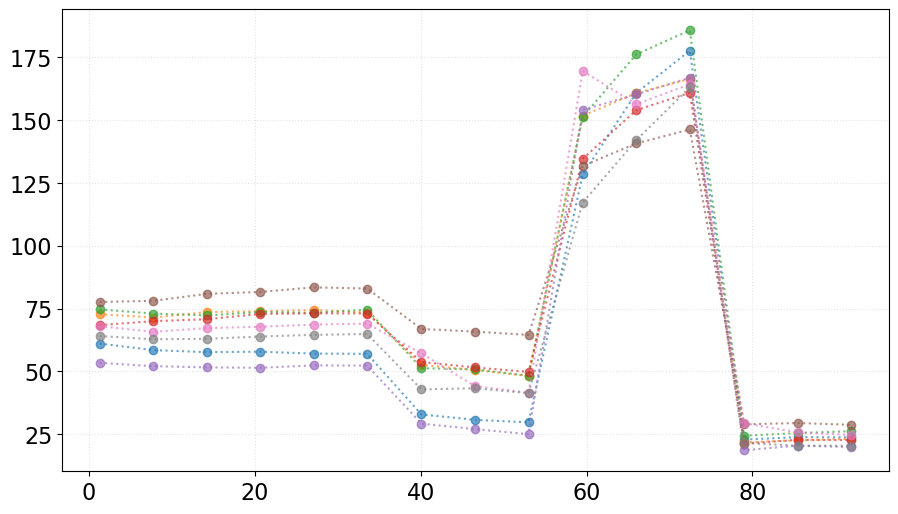

E03    0.907808
E04    1.053753
E05    1.094270
E06    1.018633
E07    0.866029
E08    1.100449
E09    1.036948
E10    0.922110
dtype: float64
	 after normalization


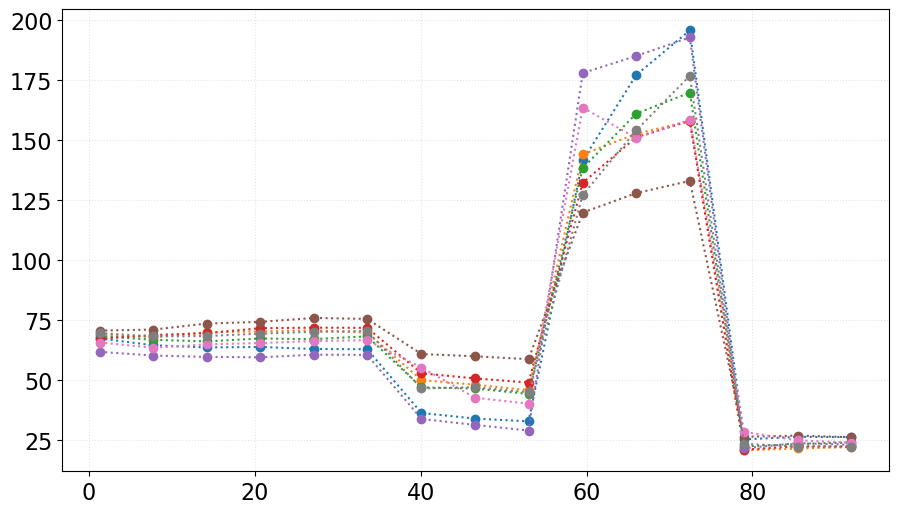

In [6]:
working_groups = ['Control', '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Adreanline:Noradrenaline 5 uM']

excluded_wells = {}
excluded_wells['Control'] = ['F11', 'B11', 'C11', 'G11', 'F02', 'G02']
excluded_wells['4 HRS - Adreanline:Noradrenaline 0.5 uM'] = ['F03', 'F07', 'F04']
excluded_wells['4 HRS - Adreanline:Noradrenaline 5 uM'] = []

treated_trajectories = {}

for condition in working_groups:
    
    print(condition)
    sub = df[df['Group'] == condition]

    # generate dataframe for this trajectory
    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'OCR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plot original data
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # exclude samples that failed technically
    dff.drop(excluded_wells[condition], axis='columns', inplace=True)

    # plot after excluding technical failures
    print('\t after excluding technical failures')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # normalization
    relative_mu = dff.mean()/dff.mean().mean()
    print(relative_mu)
    normalized = dff/relative_mu

    # plot after normalization
    print('\t after normalization')
    matplotlib.pyplot.plot(dff.index, normalized, 'o:')
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # adding the treated data into container
    treated_trajectories[condition] = normalized

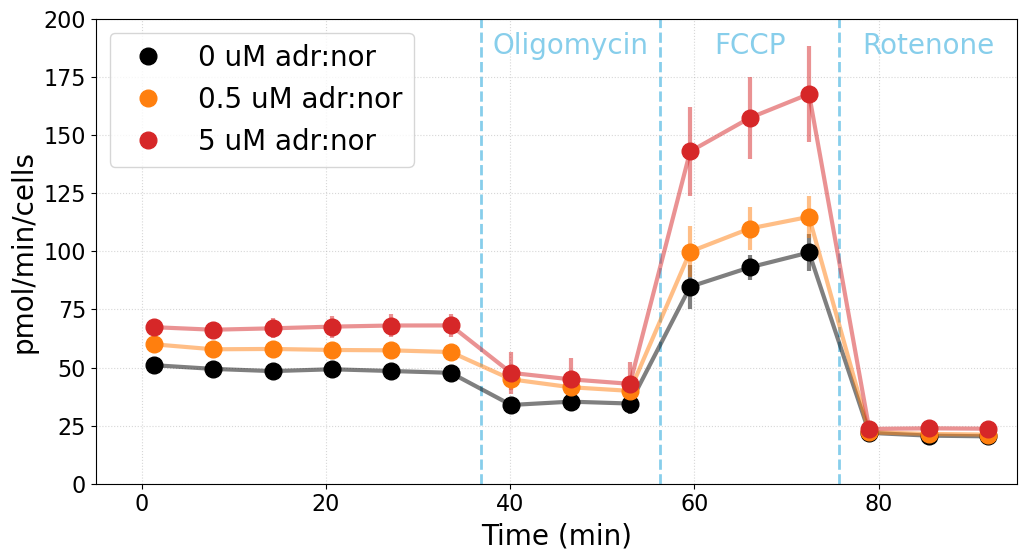

In [7]:
# genarate final figure

palette = ['black', 'tab:orange', 'tab:red']
my_labels = ['0 uM adr:nor', '0.5 uM adr:nor', '5 uM adr:nor']

for i in range(len(working_groups)):

    condition = working_groups[i]
    wdf = treated_trajectories[condition]

    mean = wdf.mean(axis=1)
    std = wdf.std(axis=1)
    t = wdf.index
    matplotlib.pyplot.errorbar(t, mean, std, lw=3, color=palette[i], alpha=1/2)
    matplotlib.pyplot.plot(t, mean, 'o', color=palette[i], ms=12, label=my_labels[i], zorder=999)

l1 = numpy.mean([t[5], t[6]])
l2 = numpy.mean([t[8], t[9]])
l3 = numpy.mean([t[11], t[12]])
matplotlib.pyplot.axvline(x=l1, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l2, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l3, ls='--', lw=2, color='skyblue', zorder=1)

c1 = numpy.mean([l1, l2])
c2 = numpy.mean([l2, l3])
c3 = numpy.mean([l3, 95])
matplotlib.pyplot.text(c1, 185, 'Oligomycin', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c2, 185, 'FCCP', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c3, 185, 'Rotenone', color='skyblue', horizontalalignment='center')

matplotlib.pyplot.xlim([-5, 95])
matplotlib.pyplot.ylim([0, 200])

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')

matplotlib.pyplot.legend(loc=2)

matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# matplotlib.pyplot.savefig('seahorse.ocr.4h.svg')

# OCR at 24 hours

In [8]:
df['Group'].unique()

array(['Background', 'Control', '24 HRS - Adreanline:Noradrenaline 5 uM',
       '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Tnfa',
       '4 HRS - Adreanline:Noradrenaline 5 uM',
       '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Tnfa'],
      dtype=object)

Control
	 before normalization


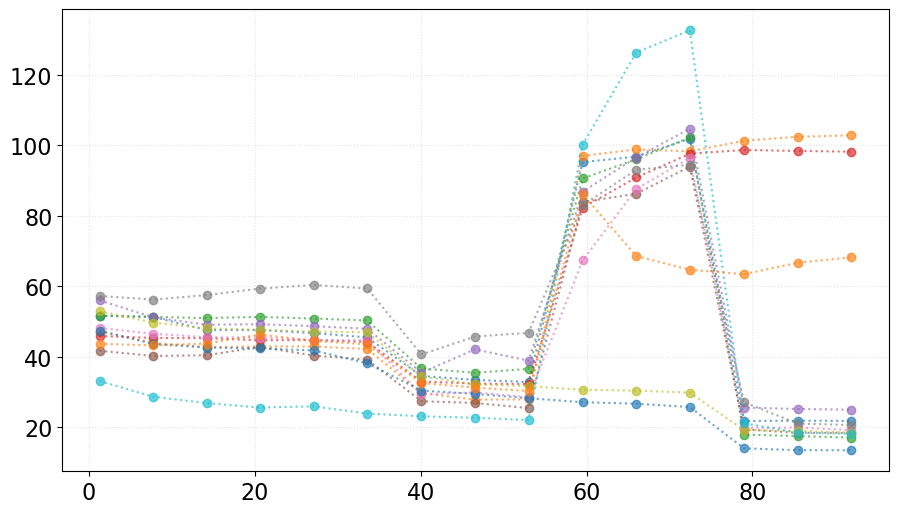

	 after excluding technical failures


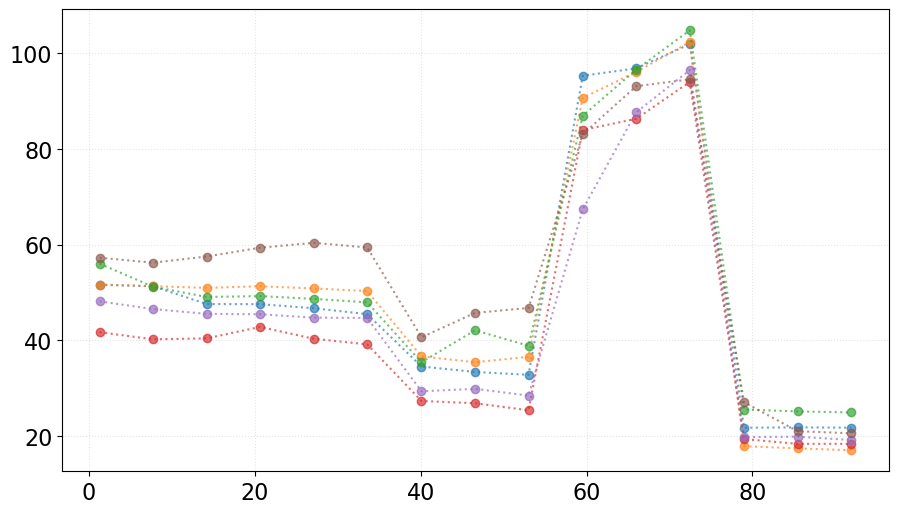

B02    1.016296
C02    1.024606
D02    1.059785
D11    0.873264
E02    0.911857
E11    1.114192
dtype: float64
	 after normalization


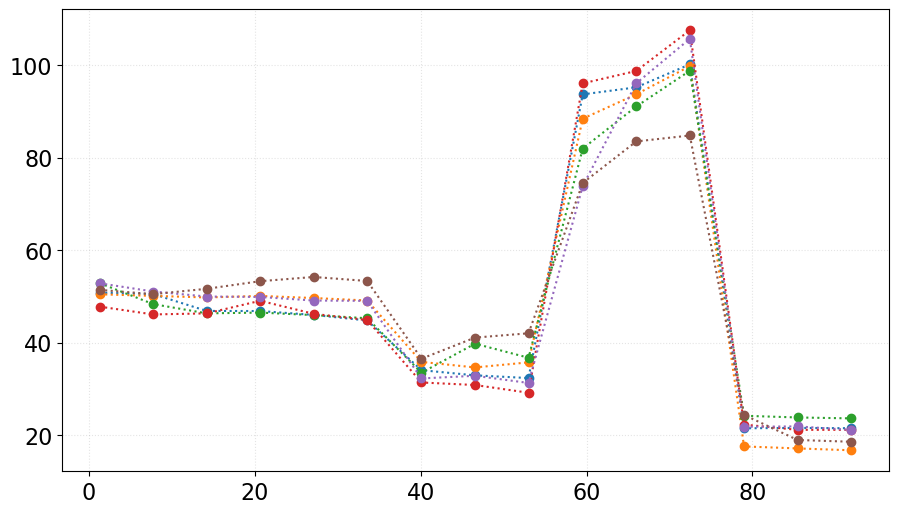

24 HRS - Adreanline:Noradrenaline 0.5 uM
	 before normalization


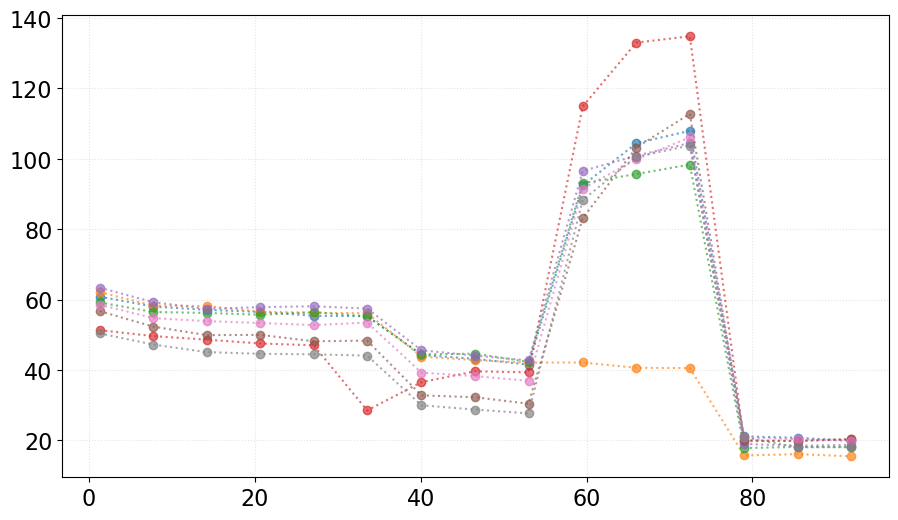

	 after excluding technical failures


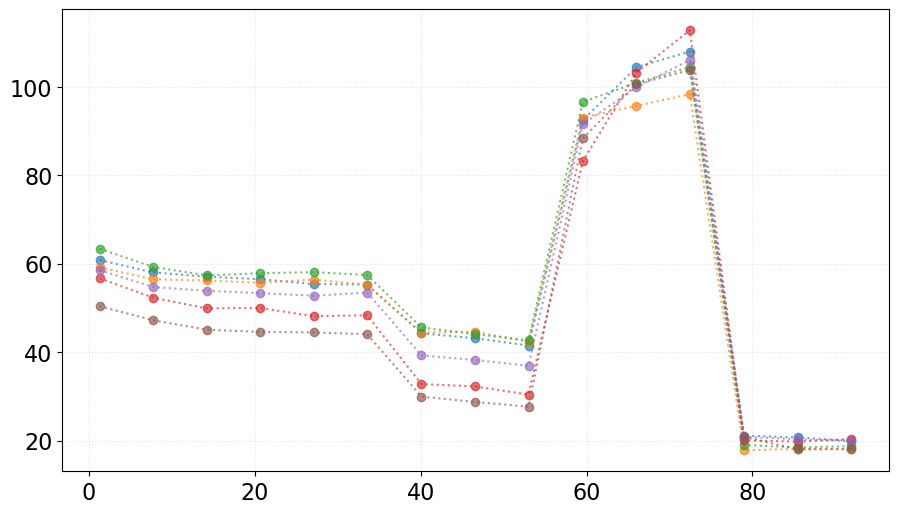

C03    1.055815
C05    1.021804
C07    1.062493
C08    0.956981
C09    1.006744
C10    0.896163
dtype: float64
	 after normalization


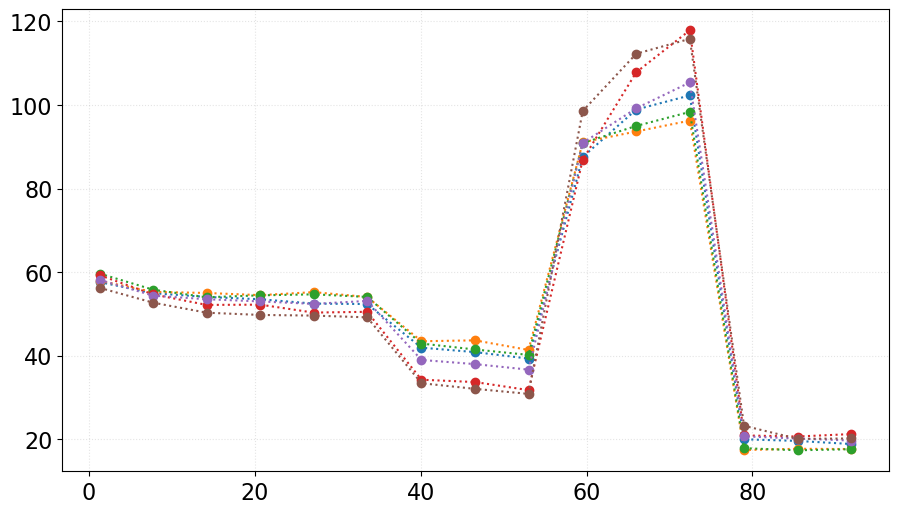

24 HRS - Adreanline:Noradrenaline 5 uM
	 before normalization


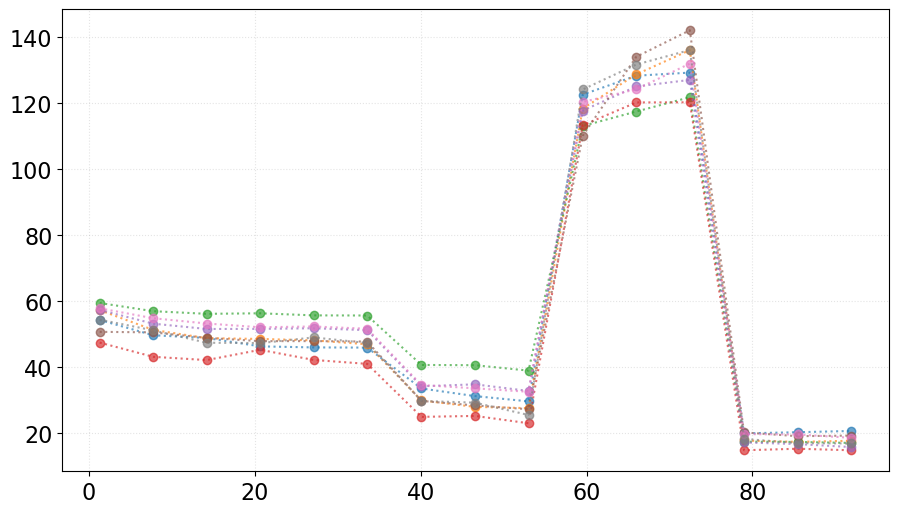

	 after excluding technical failures


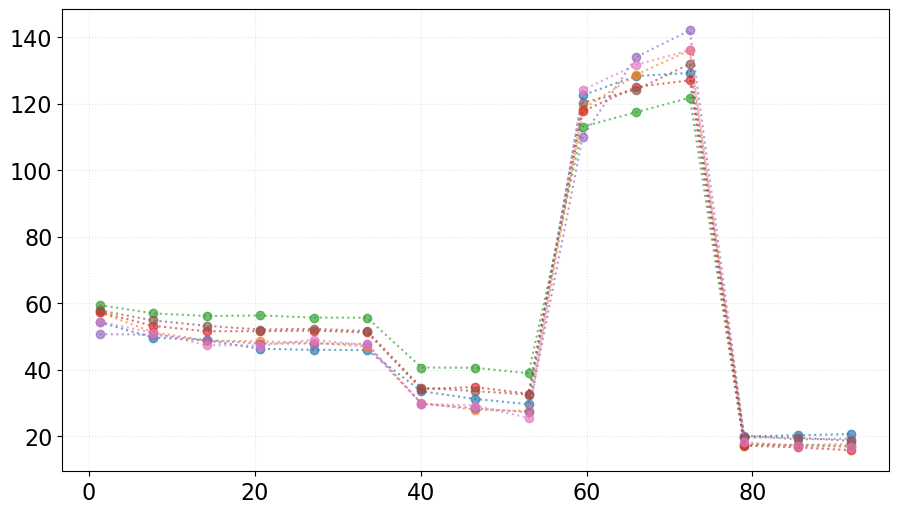

B03    0.987647
B04    0.982799
B05    1.033223
B07    1.001425
B08    0.984581
B09    1.024262
B10    0.986063
dtype: float64
	 after normalization


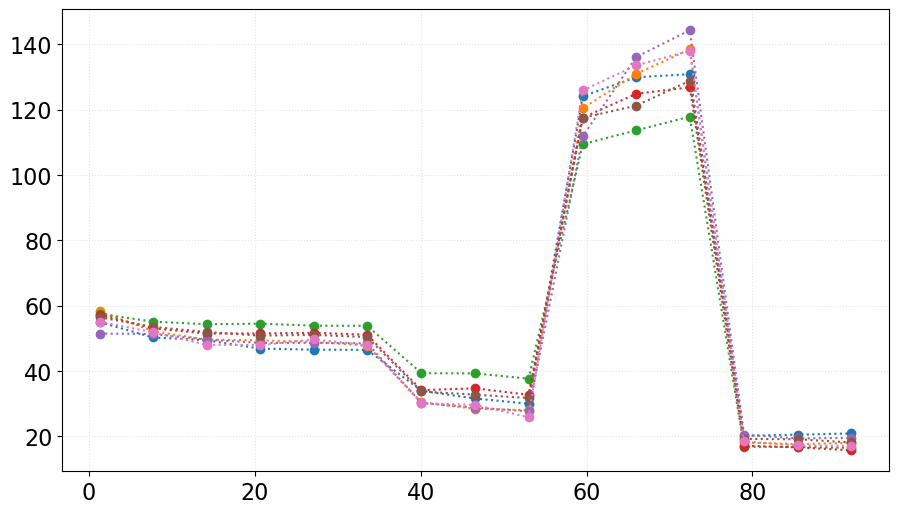

In [9]:
working_groups = ['Control', '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Adreanline:Noradrenaline 5 uM']

excluded_wells = {}
excluded_wells['Control'] = ['F11', 'B11', 'C11', 'G11', 'F02', 'G02']
excluded_wells['24 HRS - Adreanline:Noradrenaline 0.5 uM'] = ['C04', 'C06']
excluded_wells['24 HRS - Adreanline:Noradrenaline 5 uM'] = ['B06']

treated_trajectories = {}

for condition in working_groups:
    
    print(condition)
    sub = df[df['Group'] == condition]

    # generate dataframe for this trajectory
    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'OCR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plot original data
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # exclude samples that failed technically
    dff.drop(excluded_wells[condition], axis='columns', inplace=True)

    # plot after excluding technical failures
    print('\t after excluding technical failures')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # normalization
    relative_mu = dff.mean()/dff.mean().mean()
    print(relative_mu)
    normalized = dff/relative_mu

    # plot after normalization
    print('\t after normalization')
    matplotlib.pyplot.plot(dff.index, normalized, 'o:')
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # adding the treated data into container
    treated_trajectories[condition] = normalized

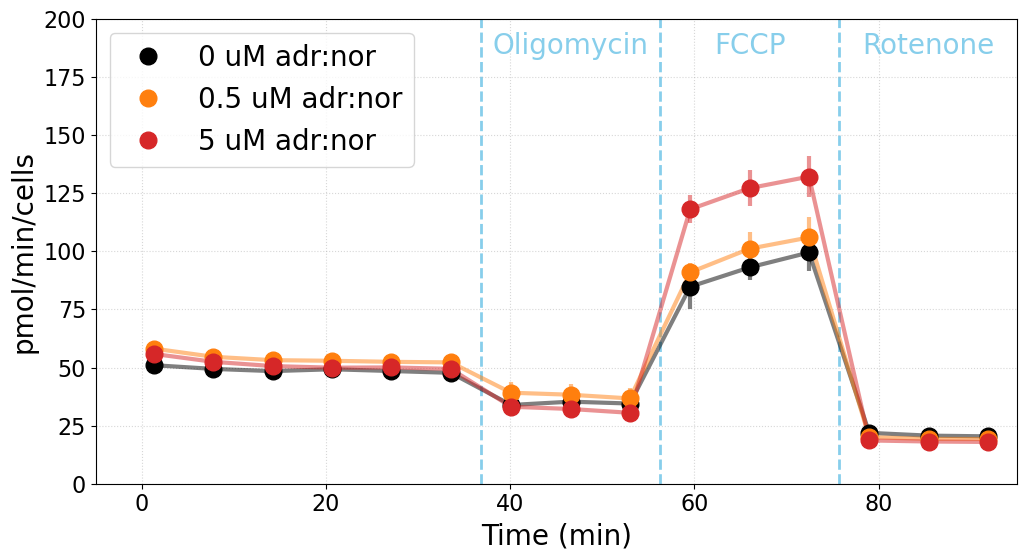

In [10]:
# genarate final figure

palette = ['black', 'tab:orange', 'tab:red']
my_labels = ['0 uM adr:nor', '0.5 uM adr:nor', '5 uM adr:nor']

for i in range(len(working_groups)):

    condition = working_groups[i]
    wdf = treated_trajectories[condition]

    mean = wdf.mean(axis=1)
    std = wdf.std(axis=1)
    t = wdf.index
    matplotlib.pyplot.errorbar(t, mean, std, lw=3, color=palette[i], alpha=1/2)
    matplotlib.pyplot.plot(t, mean, 'o', color=palette[i], ms=12, label=my_labels[i], zorder=999)

l1 = numpy.mean([t[5], t[6]])
l2 = numpy.mean([t[8], t[9]])
l3 = numpy.mean([t[11], t[12]])
matplotlib.pyplot.axvline(x=l1, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l2, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l3, ls='--', lw=2, color='skyblue', zorder=1)

c1 = numpy.mean([l1, l2])
c2 = numpy.mean([l2, l3])
c3 = numpy.mean([l3, 95])
matplotlib.pyplot.text(c1, 185, 'Oligomycin', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c2, 185, 'FCCP', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c3, 185, 'Rotenone', color='skyblue', horizontalalignment='center')

matplotlib.pyplot.xlim([-5, 95])
matplotlib.pyplot.ylim([0, 200])

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')

matplotlib.pyplot.legend(loc=2)

matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# matplotlib.pyplot.savefig('seahorse.ocr.24h.svg')

# ECAR at 4 hours

In [11]:
df['Group'].unique()

array(['Background', 'Control', '24 HRS - Adreanline:Noradrenaline 5 uM',
       '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Tnfa',
       '4 HRS - Adreanline:Noradrenaline 5 uM',
       '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Tnfa'],
      dtype=object)

Control
	 before normalization


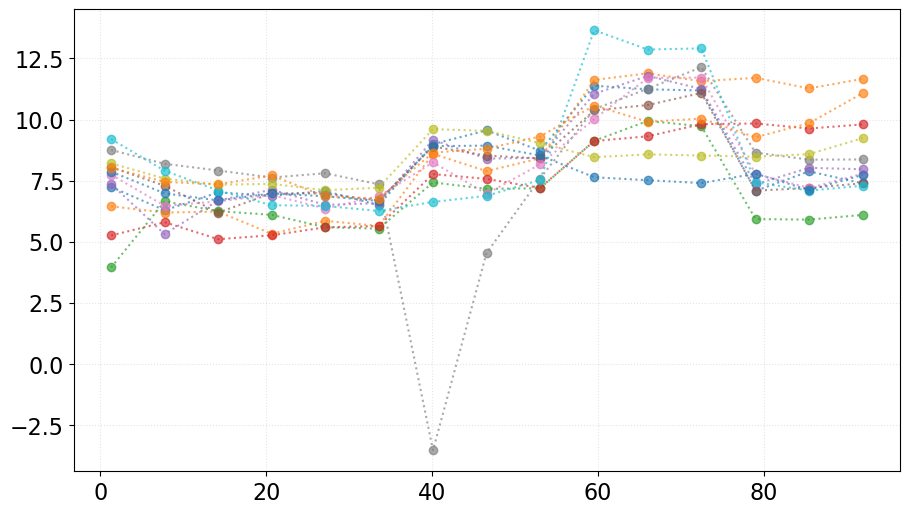

	 after excluding technical failures


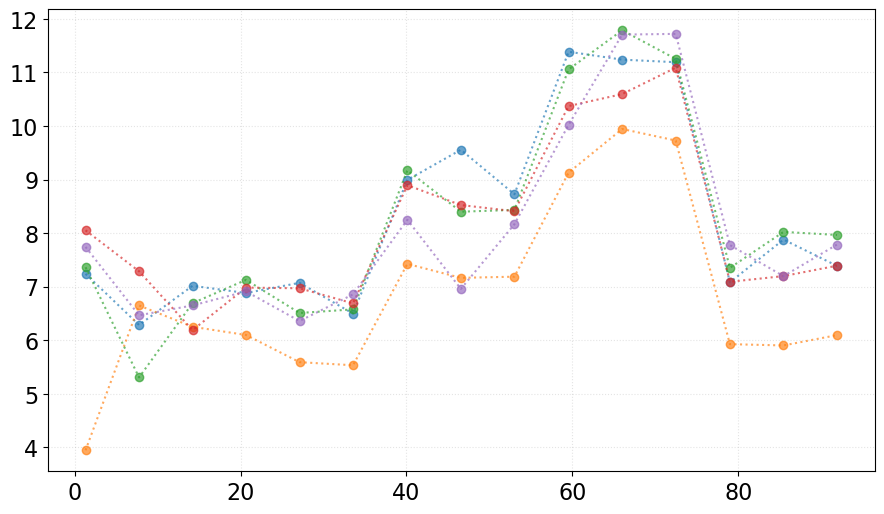

	 after normalization


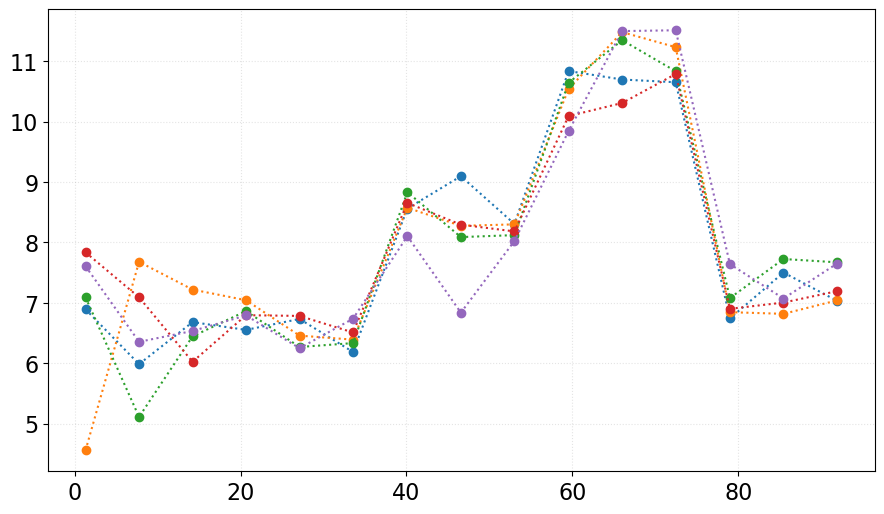

4 HRS - Adreanline:Noradrenaline 0.5 uM
	 before normalization


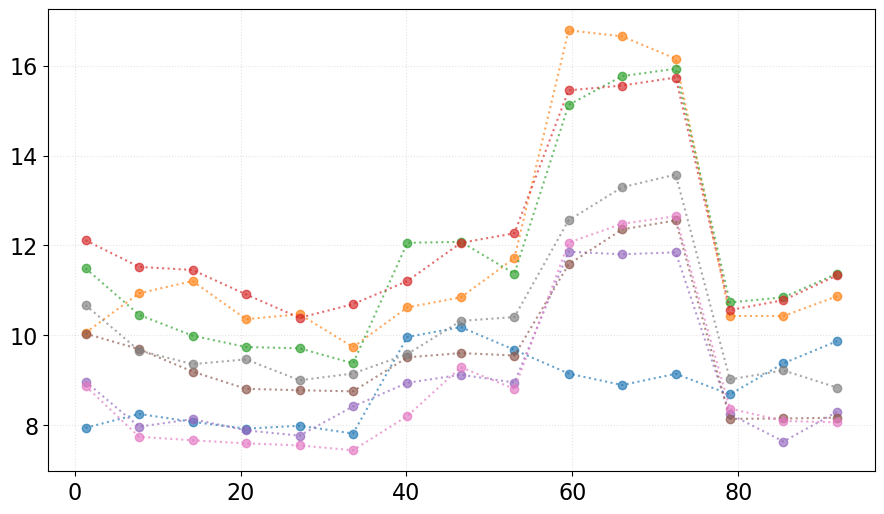

	 after excluding technical failures


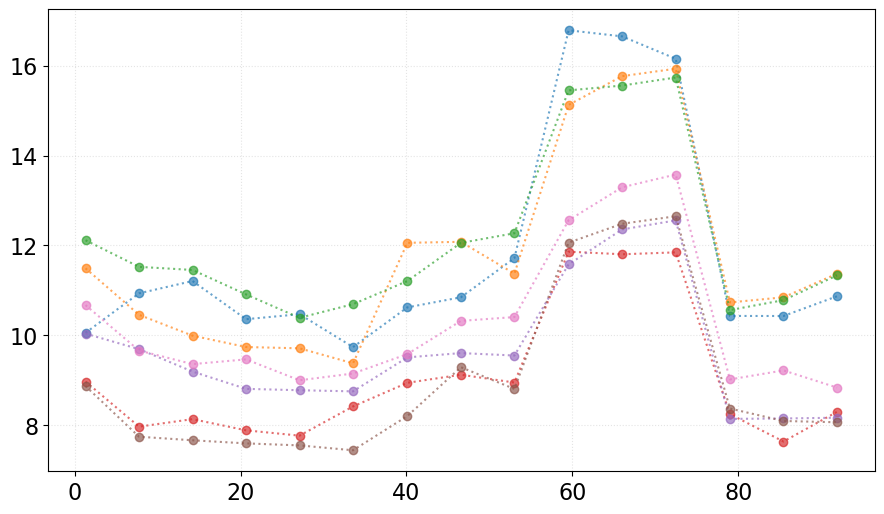

	 after normalization


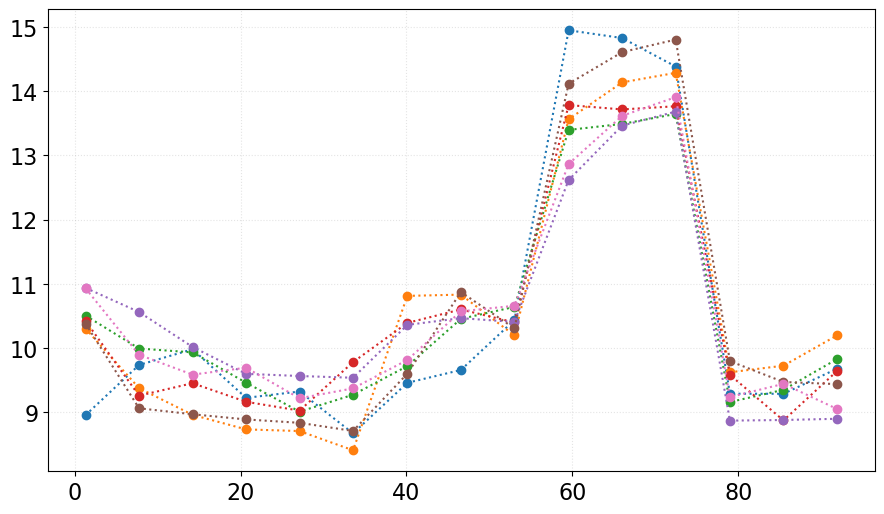

4 HRS - Adreanline:Noradrenaline 5 uM
	 before normalization


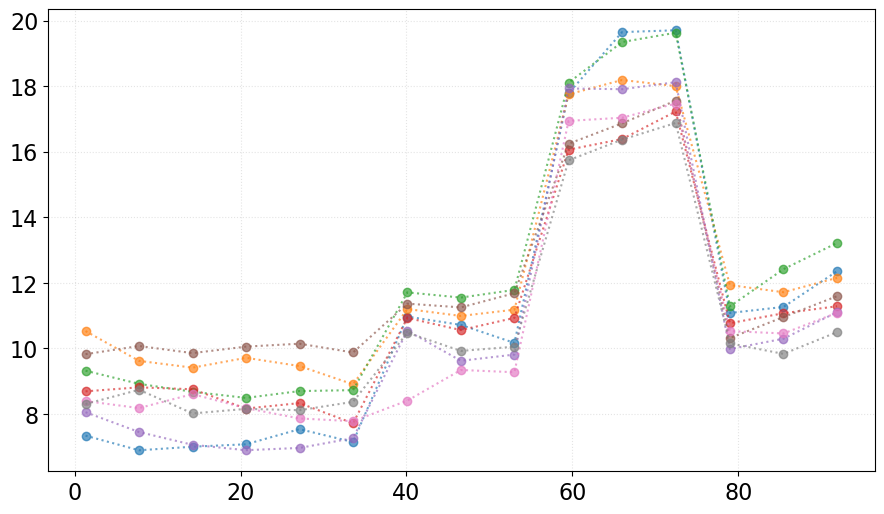

	 after excluding technical failures


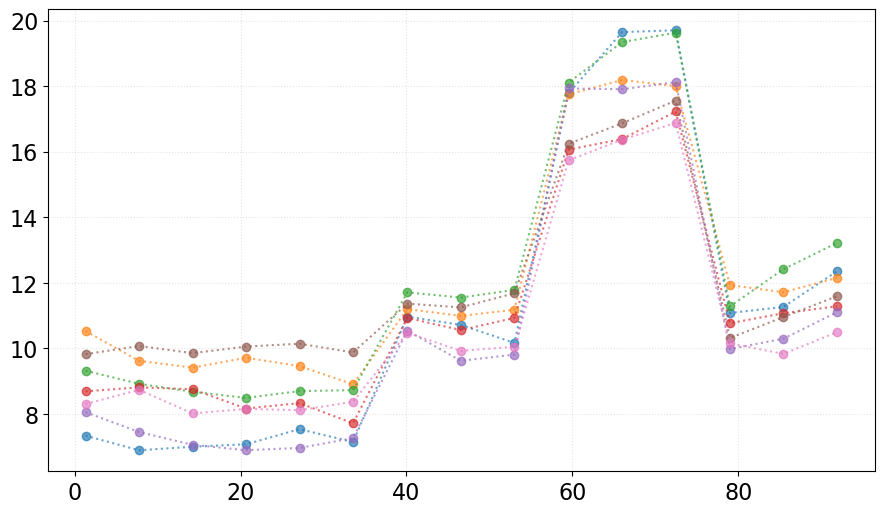

	 after normalization


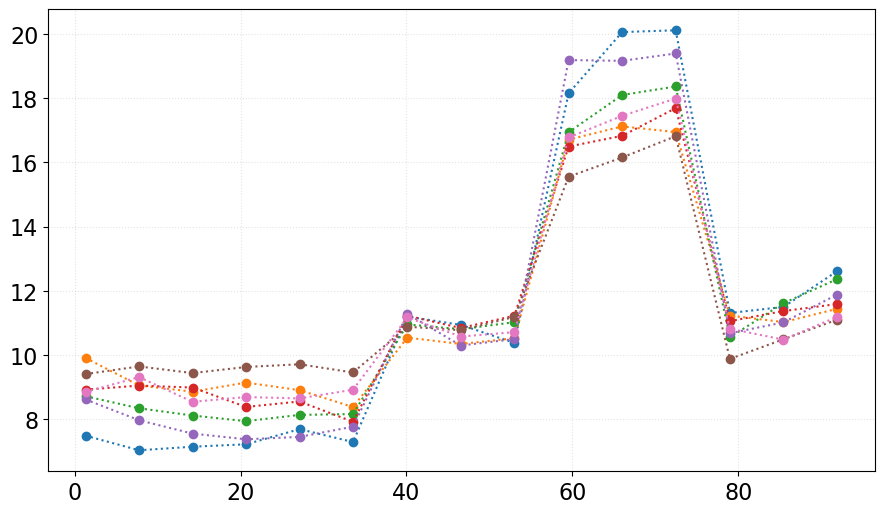

In [12]:
working_groups = ['Control', '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Adreanline:Noradrenaline 5 uM']

excluded_wells = {}
excluded_wells['Control'] = ['E11', 'F11', 'F02', 'G02', 'B11', 'G11', 'C11']
excluded_wells['4 HRS - Adreanline:Noradrenaline 0.5 uM'] = ['F03']
excluded_wells['4 HRS - Adreanline:Noradrenaline 5 uM'] = ['E09']

treated_trajectories = {}

for condition in working_groups:
    
    print(condition)
    sub = df[df['Group'] == condition]

    # generate dataframe for this trajectory
    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'ECAR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'ECAR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plot original data
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # exclude samples that failed technically
    dff.drop(excluded_wells[condition], axis='columns', inplace=True)

    # plot after excluding technical failures
    print('\t after excluding technical failures')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # normalization
    relative_mu = dff.mean()/dff.mean().mean()
    normalized = dff/relative_mu

    # normalization on initial state
    #inistate = dff.iloc[:6, :]
    #relative_mu = inistate.mean()/inistate.mean().mean()
    #normalized = dff/relative_mu

    # plot after normalization
    print('\t after normalization')
    matplotlib.pyplot.plot(dff.index, normalized, 'o:')
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # adding the treated data into container
    treated_trajectories[condition] = normalized

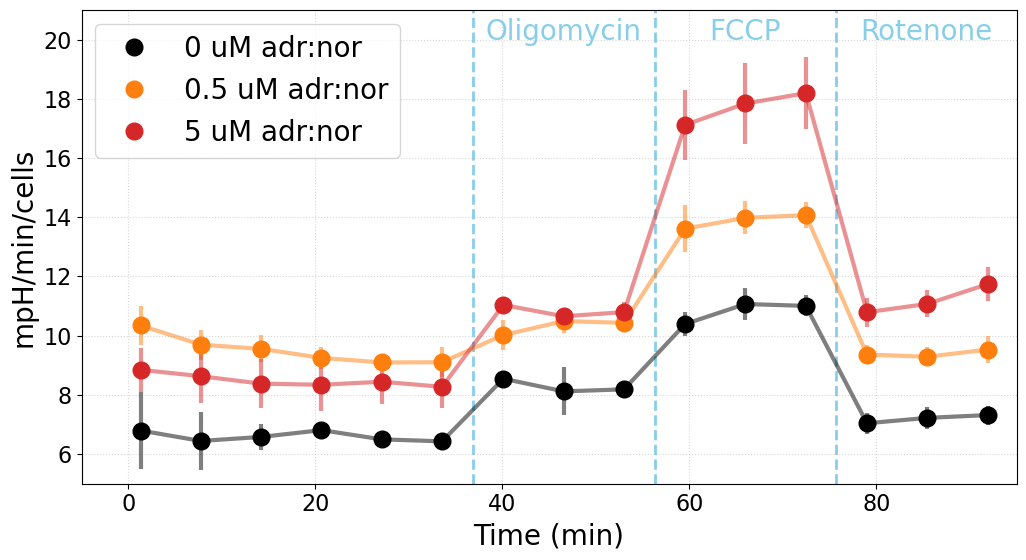

In [13]:
# genarate final figure

palette = ['black', 'tab:orange', 'tab:red']
my_labels = ['0 uM adr:nor', '0.5 uM adr:nor', '5 uM adr:nor']

for i in range(len(working_groups)):

    condition = working_groups[i]
    wdf = treated_trajectories[condition]

    mean = wdf.mean(axis=1)
    std = wdf.std(axis=1)
    t = wdf.index
    matplotlib.pyplot.errorbar(t, mean, std, lw=3, color=palette[i], alpha=1/2)
    matplotlib.pyplot.plot(t, mean, 'o', color=palette[i], ms=12, label=my_labels[i], zorder=999)

l1 = numpy.mean([t[5], t[6]])
l2 = numpy.mean([t[8], t[9]])
l3 = numpy.mean([t[11], t[12]])
matplotlib.pyplot.axvline(x=l1, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l2, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l3, ls='--', lw=2, color='skyblue', zorder=1)

c1 = numpy.mean([l1, l2])
c2 = numpy.mean([l2, l3])
c3 = numpy.mean([l3, 95])
matplotlib.pyplot.text(c1, 20, 'Oligomycin', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c2, 20, 'FCCP', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c3, 20, 'Rotenone', color='skyblue', horizontalalignment='center')

matplotlib.pyplot.xlim([-5, 95])
matplotlib.pyplot.ylim([5, 21])

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')

matplotlib.pyplot.legend(loc=2)

matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# matplotlib.pyplot.savefig('seahorse.ecar.4h.svg')

# ECAR 24 hours

Control
	 before normalization


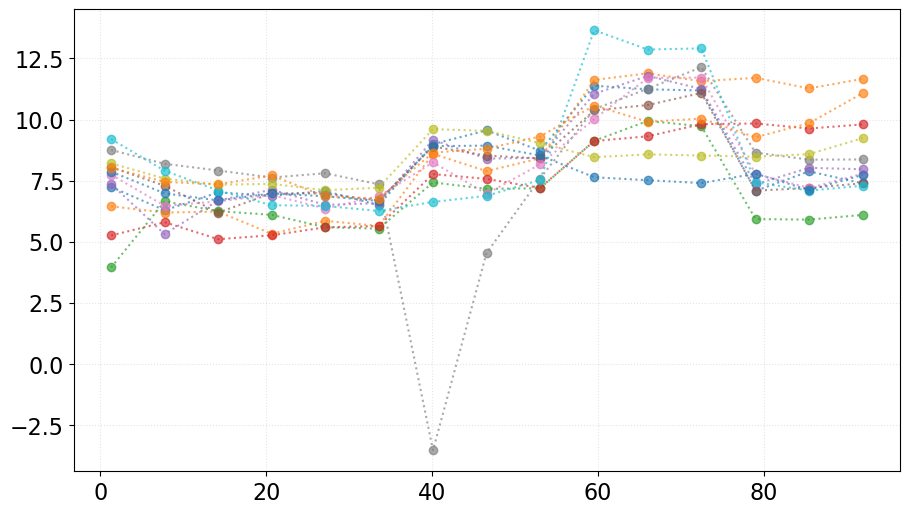

	 after excluding technical failures


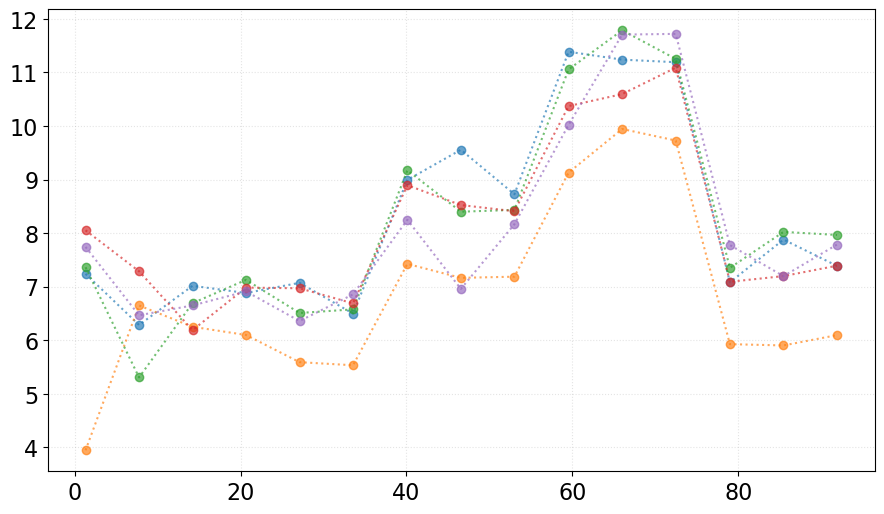

	 after normalization


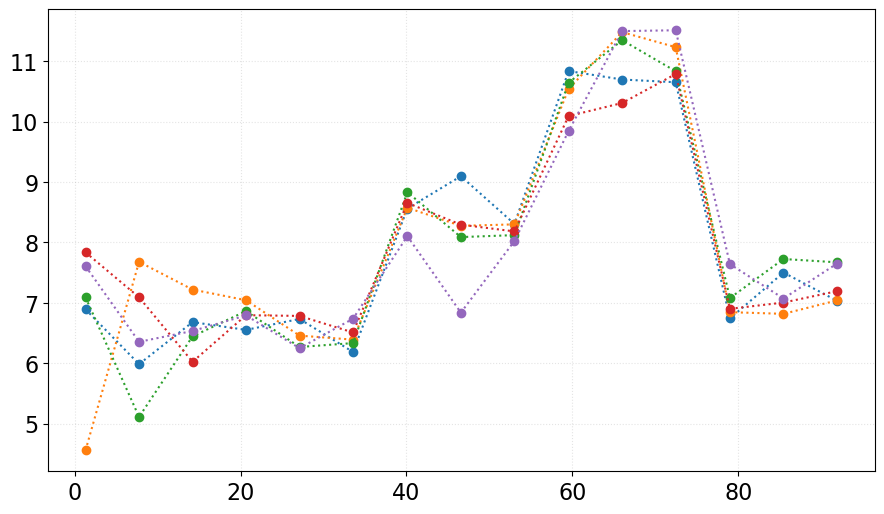

24 HRS - Adreanline:Noradrenaline 0.5 uM
	 before normalization


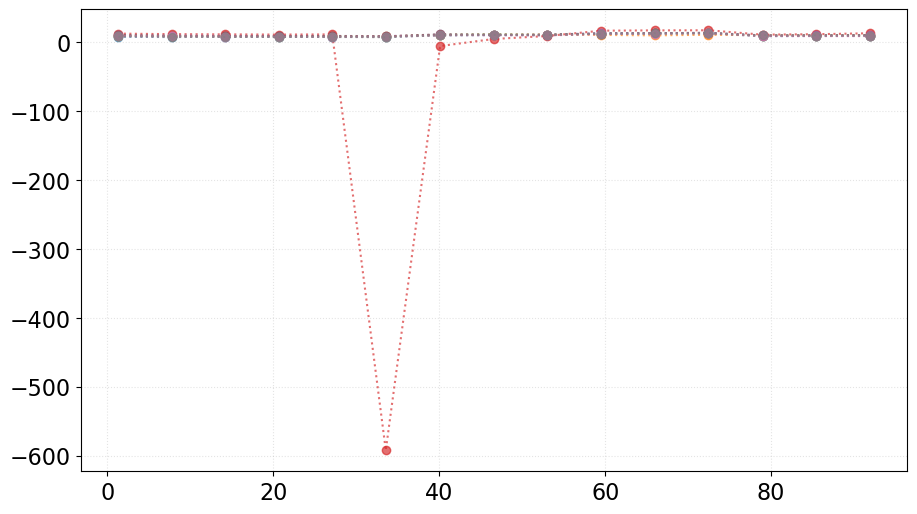

	 after excluding technical failures


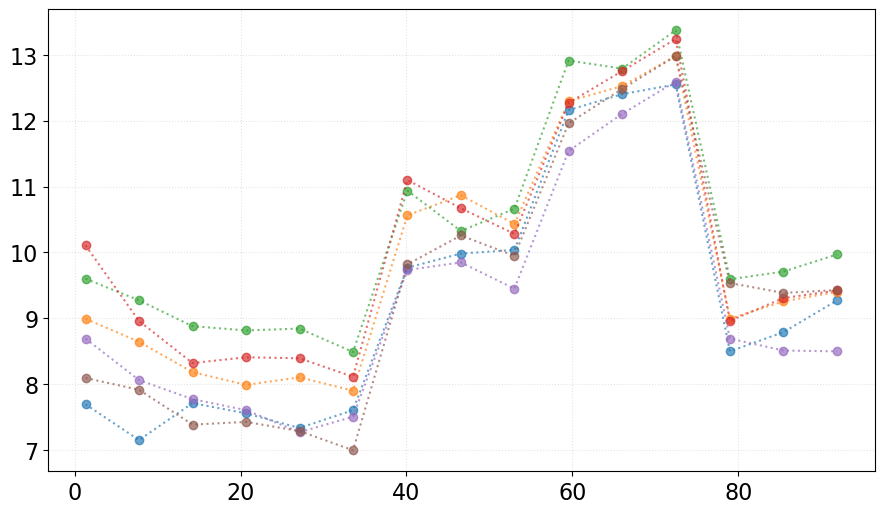

	 after normalization


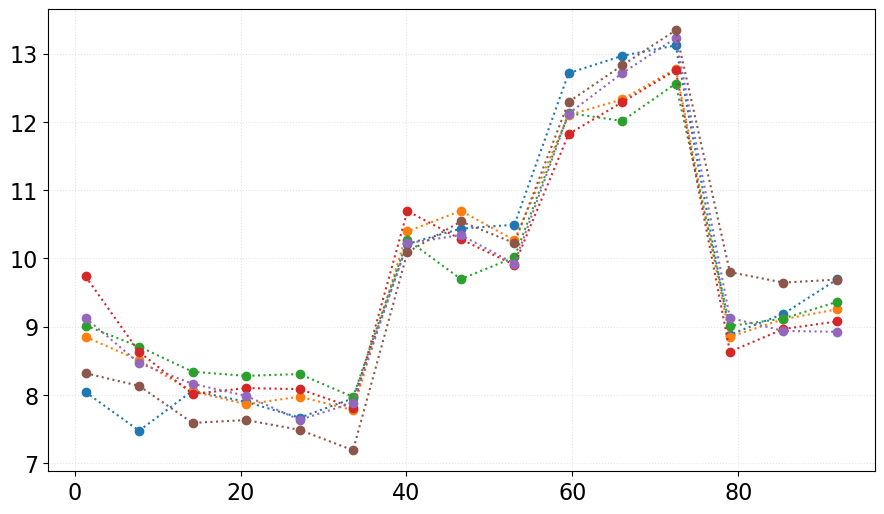

24 HRS - Adreanline:Noradrenaline 5 uM
	 before normalization


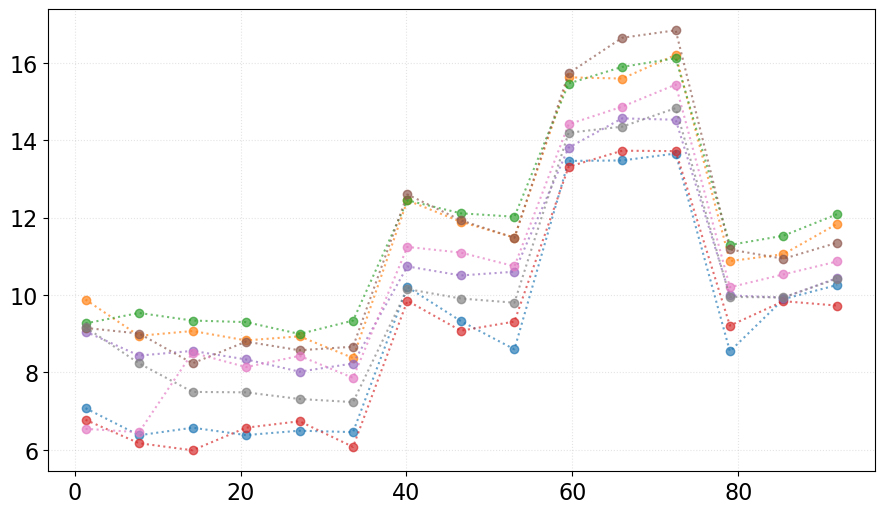

	 after excluding technical failures


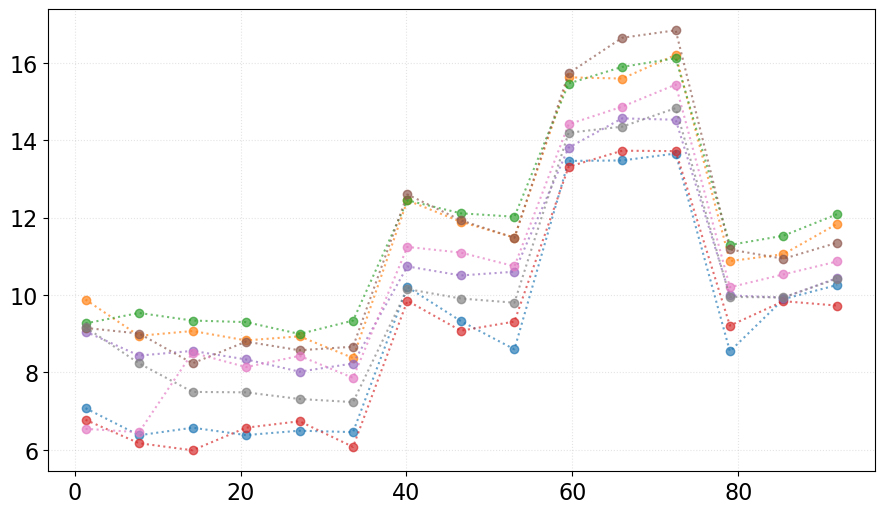

	 after normalization


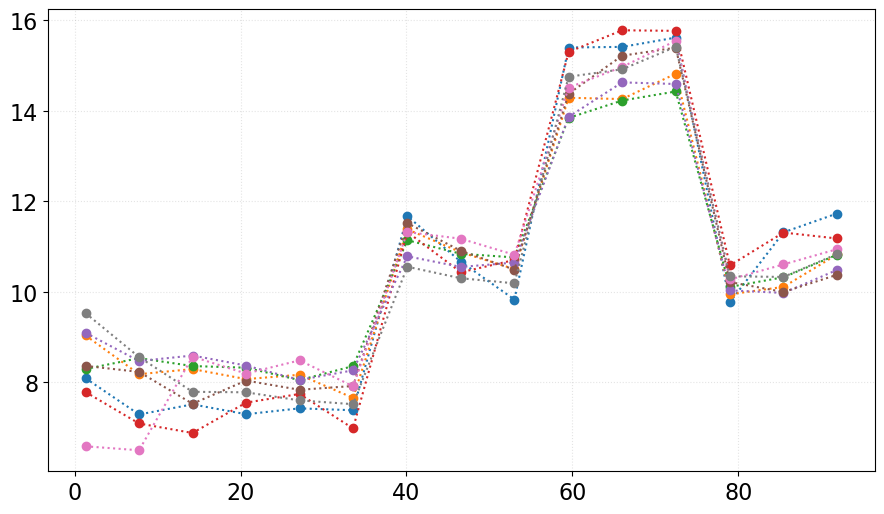

In [14]:
working_groups = ['Control', '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Adreanline:Noradrenaline 5 uM']

excluded_wells = {}
excluded_wells['Control'] = ['E11', 'F11', 'F02', 'G02', 'B11', 'G11', 'C11']
excluded_wells['24 HRS - Adreanline:Noradrenaline 0.5 uM'] = ['C06', 'C04']
excluded_wells['24 HRS - Adreanline:Noradrenaline 5 uM'] = []

treated_trajectories = {}

for condition in working_groups:
    
    print(condition)
    sub = df[df['Group'] == condition]

    # generate dataframe for this trajectory
    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'ECAR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'ECAR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plot original data
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # exclude samples that failed technically
    dff.drop(excluded_wells[condition], axis='columns', inplace=True)

    # plot after excluding technical failures
    print('\t after excluding technical failures')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # normalization
    relative_mu = dff.mean()/dff.mean().mean()
    normalized = dff/relative_mu

    # plot after normalization
    print('\t after normalization')
    matplotlib.pyplot.plot(dff.index, normalized, 'o:')
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # adding the treated data into container
    treated_trajectories[condition] = normalized

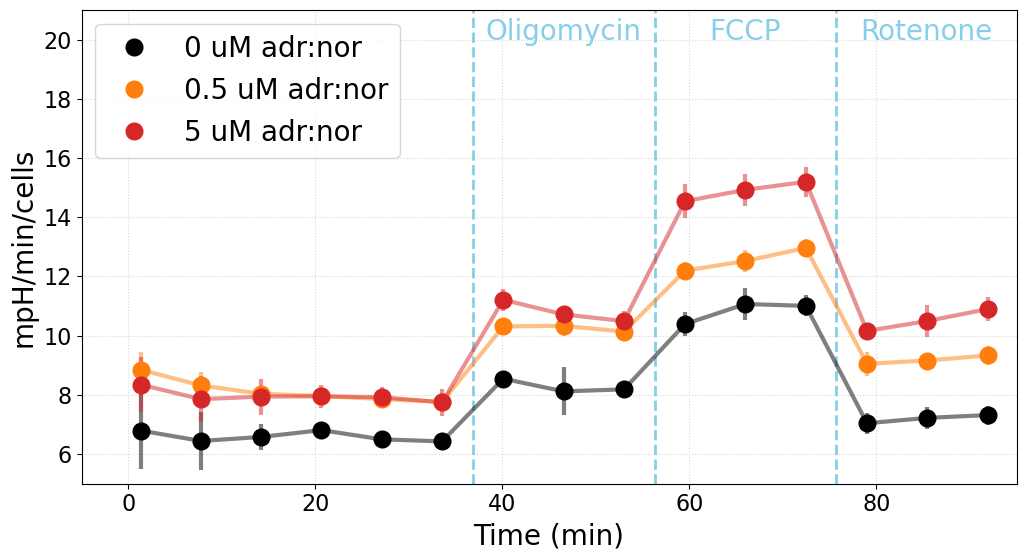

In [15]:
# genarate final figure

palette = ['black', 'tab:orange', 'tab:red']
my_labels = ['0 uM adr:nor', '0.5 uM adr:nor', '5 uM adr:nor']

for i in range(len(working_groups)):

    condition = working_groups[i]
    wdf = treated_trajectories[condition]

    mean = wdf.mean(axis=1)
    std = wdf.std(axis=1)
    t = wdf.index
    matplotlib.pyplot.errorbar(t, mean, std, lw=3, color=palette[i], alpha=1/2)
    matplotlib.pyplot.plot(t, mean, 'o', color=palette[i], ms=12, label=my_labels[i], zorder=999)

l1 = numpy.mean([t[5], t[6]])
l2 = numpy.mean([t[8], t[9]])
l3 = numpy.mean([t[11], t[12]])
matplotlib.pyplot.axvline(x=l1, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l2, ls='--', lw=2, color='skyblue', zorder=1)
matplotlib.pyplot.axvline(x=l3, ls='--', lw=2, color='skyblue', zorder=1)

c1 = numpy.mean([l1, l2])
c2 = numpy.mean([l2, l3])
c3 = numpy.mean([l3, 95])
matplotlib.pyplot.text(c1, 20, 'Oligomycin', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c2, 20, 'FCCP', color='skyblue', horizontalalignment='center')
matplotlib.pyplot.text(c3, 20, 'Rotenone', color='skyblue', horizontalalignment='center')

matplotlib.pyplot.xlim([-5, 95])
matplotlib.pyplot.ylim([5, 21])

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')

matplotlib.pyplot.legend(loc=2)

matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# matplotlib.pyplot.savefig('seahorse.ecar.24h.svg')